#### Narcotic overdose deaths heatmaps - year 2014 to 2020

In [50]:
# packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [4]:
# import xlsx file to a pandas dataframe
overdose_data = pd.read_excel('./data/HepVu_County_Opioid_Indicators_05DEC22.xlsx')

In [6]:
# convert GEOID to string
overdose_data['GEO ID'] = overdose_data['GEO ID'].astype(str)

In [7]:
# in df GEOID column id if any GEOID is less than 6 characters insert 0 at the beginning and make it 6 characters
overdose_data['GEO ID'] = overdose_data['GEO ID'].apply(lambda x: x.zfill(5))

In [9]:
# load geospatial data
counties_2020 = gpd.read_file('./data/maps/tl_2020_us_county/tl_2020_us_county.shp')
counties_2023 = gpd.read_file('./data/maps/tl_2023_us_county/tl_2023_us_county.shp')

In [10]:
# in counties_2023, and counties_2020 df GEOID column id if any GEOID is less than 6 characters insert 0 at the beginning and make it 6 characters
counties_2023['GEOID'] = counties_2023['GEOID'].apply(lambda x: x.zfill(5))
counties_2020['GEOID'] = counties_2020['GEOID'].apply(lambda x: x.zfill(5))

In [14]:
# match the GEOID column in the df with the GEOID column in the geospatial data and get the similar row count
overdose_data['GEO ID'].isin(counties_2020['GEOID']).value_counts()

GEO ID
True    3221
Name: count, dtype: int64

In [15]:
overdose_data['GEO ID'].isin(counties_2023['GEOID']).value_counts()

GEO ID
True     3213
False       8
Name: count, dtype: int64

In [16]:
# get the unmatched GEOID rows
overdose_data[~overdose_data['GEO ID'].isin(counties_2023['GEOID'])]

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
309,09001,CT,Fairfield Count,33.7,11.1,14.7,18.6,18.1,19.2,20.1,24.6
310,09003,CT,Hartford County,39.0,17.8,23.0,29.7,34.4,32.8,37.3,42.2
311,09005,CT,Litchfield Coun,22.8,26.9,28.4,24.1,30.1,39.6,38.6,42.9
312,09007,CT,Middlesex Count,26.2,20.3,23.5,28.0,28.6,35.9,30.0,36.3
313,09009,CT,New Haven Count,48.9,17.6,24.7,29.5,34.2,30.5,39.7,46.4
314,09011,CT,New London Coun,35.4,21.1,27.3,34.7,32.9,35.0,41.1,41.6
315,09013,CT,Tolland County,17.8,16.7,16.1,22.6,27.4,23.3,22.2,31.8
316,09015,CT,Windham County,28.4,25.5,27.5,29.9,35.5,32.4,42.2,41.0


In [49]:
# making overdose data a geo data frame

In [17]:
# Add a column to the overdose_data df that contains geometry data. This should be filled with the geometry data from the counties_2020 df by matching the GEOID column in the overdose_data df with the GEOID column in the counties_2020 df.
overdose_data = overdose_data.merge(counties_2020[['GEOID', 'geometry']], left_on='GEO ID', right_on='GEOID', how='left')

In [22]:
# make this df a geospatial df
overdose_data = gpd.GeoDataFrame(overdose_data, geometry='geometry')

#### Overdose data heatmaps - Wyoming

In [23]:
overdose_data_wy = overdose_data[overdose_data['State Abbreviation'] == 'WY']

##### Wyoming complete heatmap

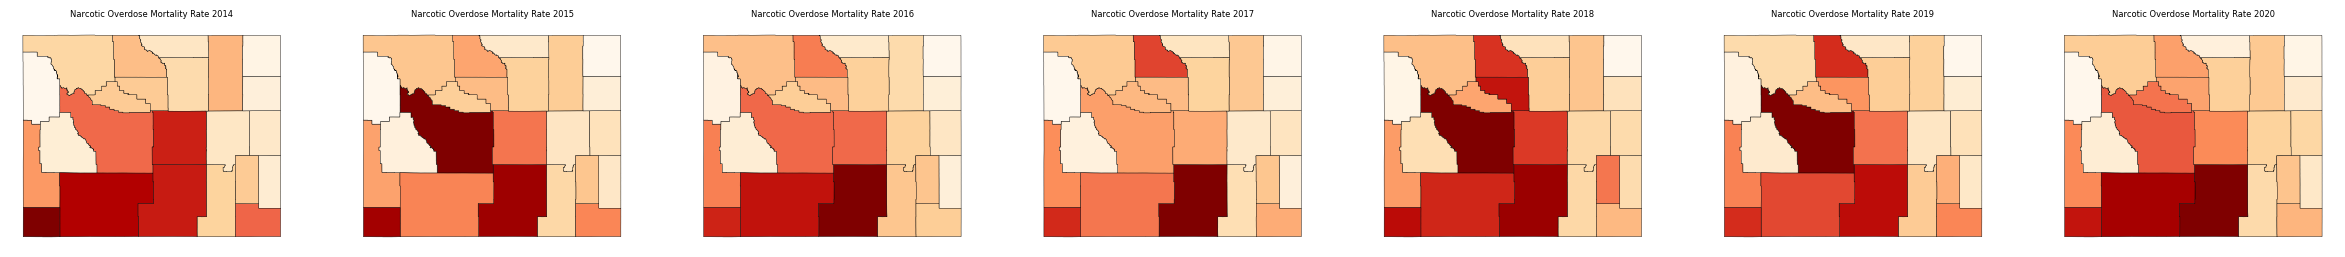

In [48]:
# plot above plot for Narcotic Overdose Mortality Rate 2014, Narcotic Overdose Mortality Rate 2015, Narcotic Overdose Mortality Rate 2016, Narcotic Overdose Mortality Rate 2017, Narcotic Overdose Mortality Rate 2018, Narcotic Overdose Mortality Rate 2019, and Narcotic Overdose Mortality Rate 2020
fig, ax = plt.subplots(1, 7, figsize=(30, 30))

for i, year in enumerate(range(2014, 2021)):
    overdose_data_wy.plot(column=f'Narcotic Overdose Mortality Rate {year}', legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=6)
    ax.flatten()[i].axis('off')

plt.show()

##### Wyoming heatmap - Counties greater than 50 th percentile

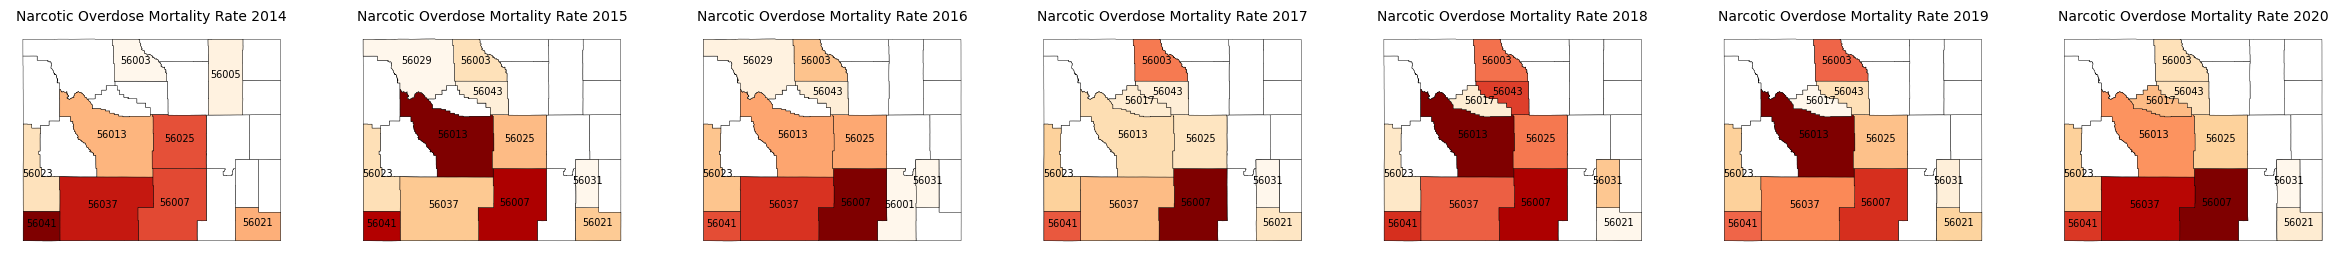

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 7, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_wy.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_wy[overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.50)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=7)

plt.show()


##### Wyoming heatmap - Counties greater than 75 th percentile

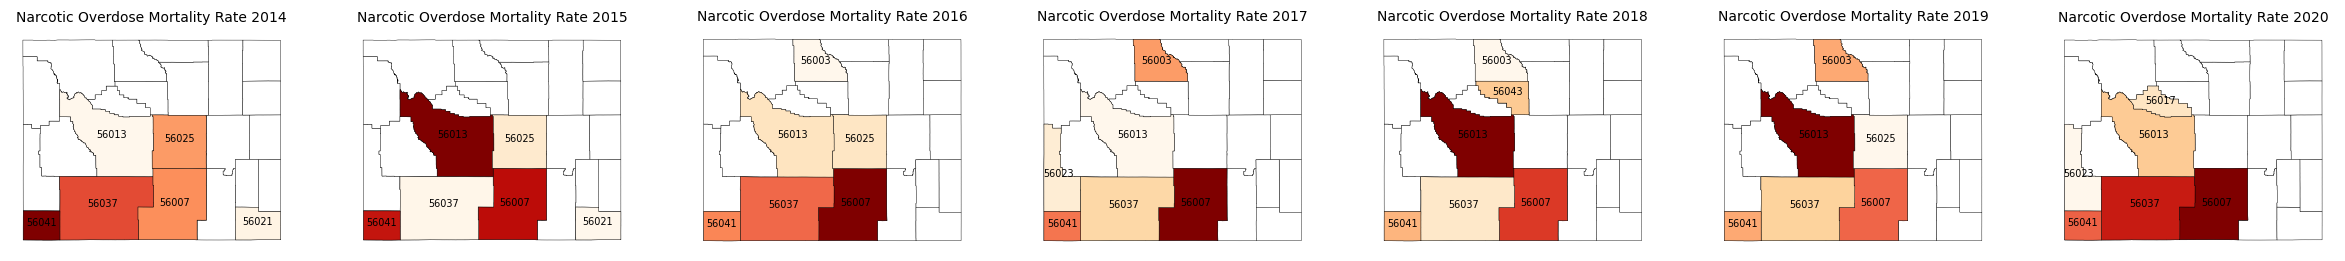

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 7, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_wy.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_wy[overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.75)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=7)

plt.show()


#### Overdose data heatmaps - Tennessee

In [51]:
overdose_data_tn = overdose_data[overdose_data['State Abbreviation'] == 'TN']

##### TN complete heatmap

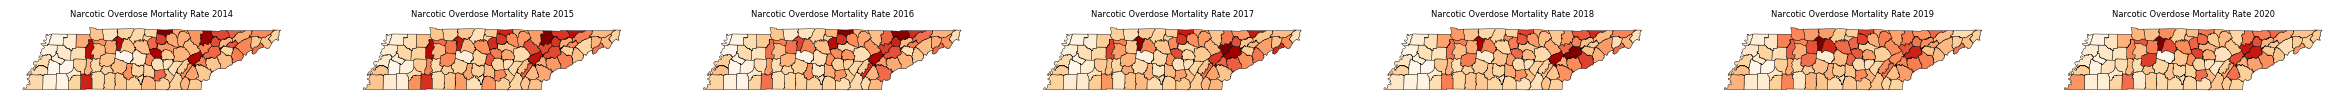

In [58]:
# plot above plot for Narcotic Overdose Mortality Rate 2014, Narcotic Overdose Mortality Rate 2015, Narcotic Overdose Mortality Rate 2016, Narcotic Overdose Mortality Rate 2017, Narcotic Overdose Mortality Rate 2018, Narcotic Overdose Mortality Rate 2019, and Narcotic Overdose Mortality Rate 2020
fig, ax = plt.subplots(1, 7, figsize=(30, 30))

for i, year in enumerate(range(2014, 2021)):
    overdose_data_tn.plot(column=f'Narcotic Overdose Mortality Rate {year}', legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=6)
    ax.flatten()[i].axis('off')

plt.show()

##### TN heatmap - Counties greater than 50 th percentile

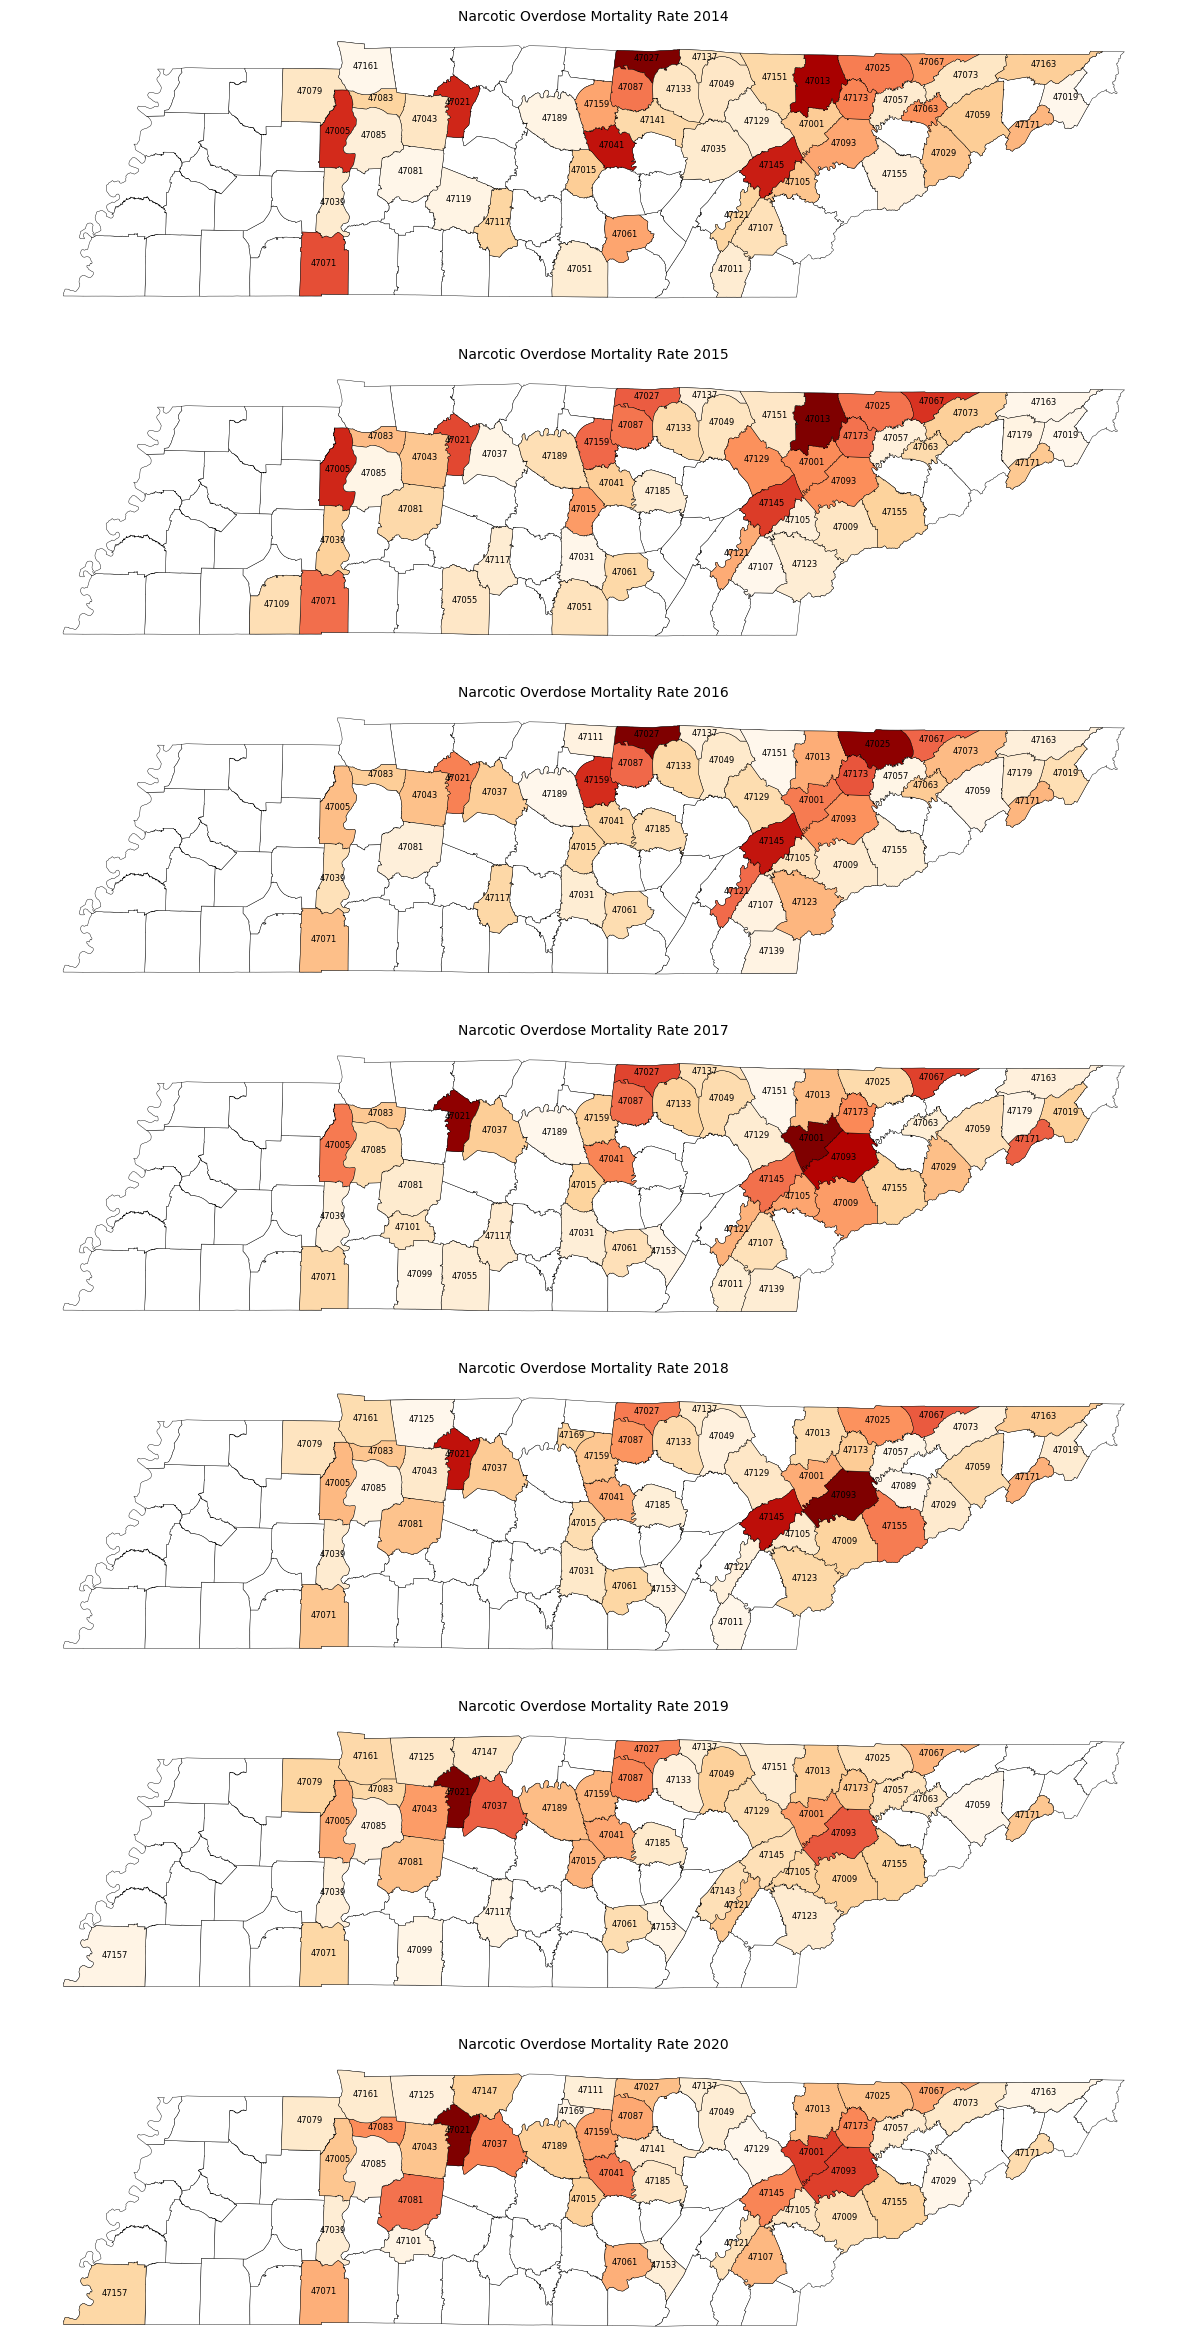

In [63]:
fig, ax = plt.subplots(7, 1, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_tn.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_tn[overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.50)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=6)

plt.show()

##### TN heatmap - Counties greater than 75 th percentile

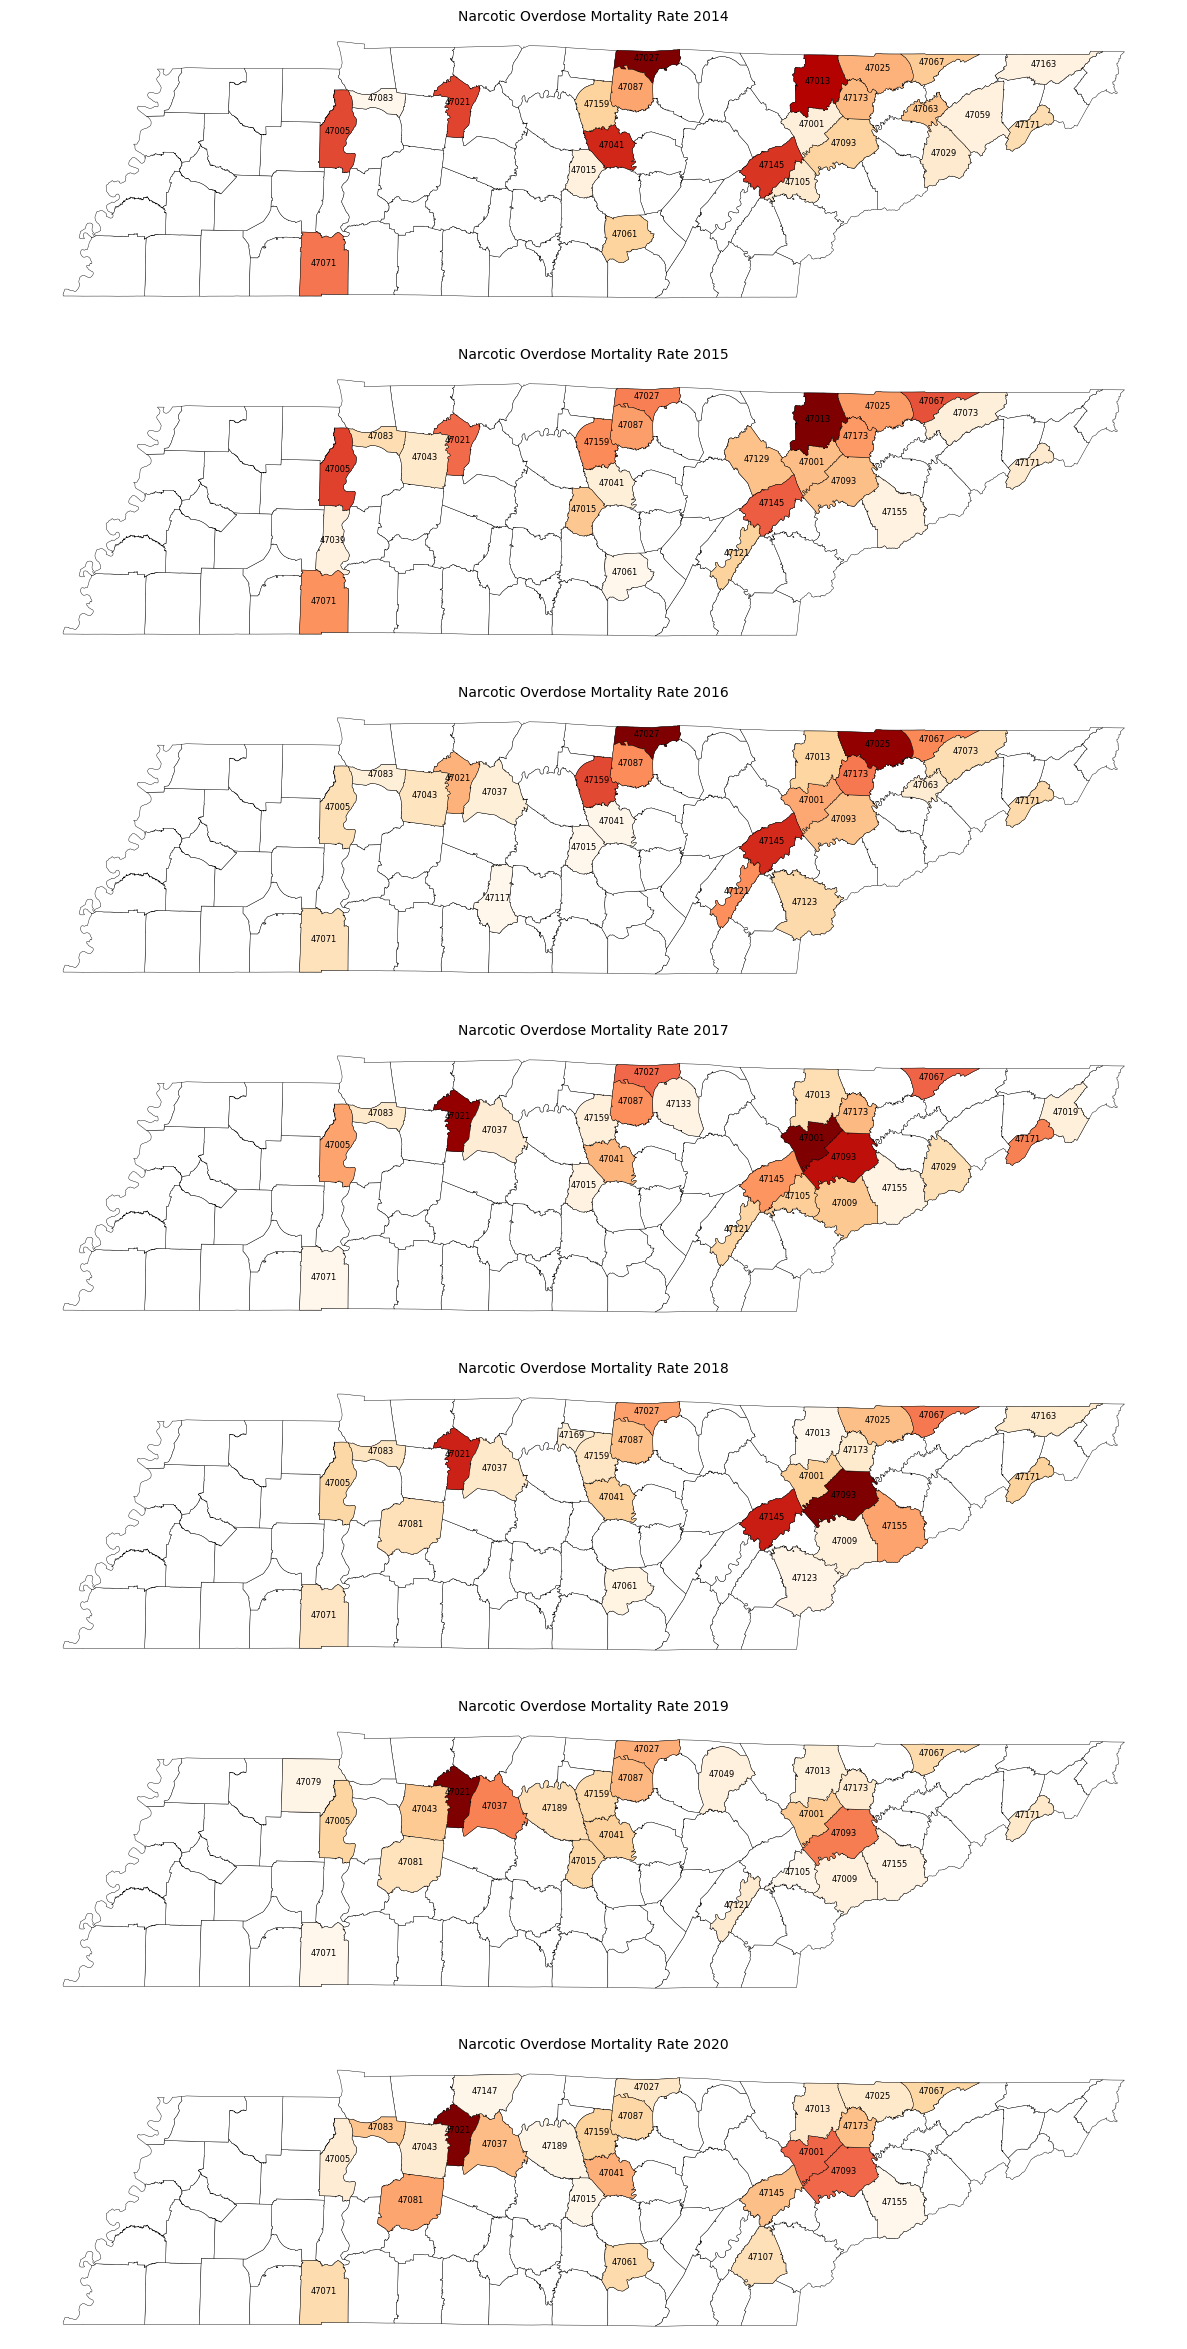

In [62]:
fig, ax = plt.subplots(7, 1, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_tn.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_tn[overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.75)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=6)
